In [17]:
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import os
import speech_recognition as sr

In [18]:
repetition_wav_files = [os.path.join('audio samples/disfluency/repetition', f) for f in os.listdir('./audio samples/disfluency/repetition')]
stutter_wav_files = [os.path.join('audio samples/disfluency/stutter', f) for f in os.listdir('./audio samples/disfluency/stutter')]
pause_wav_files = [os.path.join('audio samples/disfluency/pause', f) for f in os.listdir('./audio samples/disfluency/pause')]
stutter_pause_wav_files = [os.path.join('audio samples/disfluency/stutter_pause', f) for f in os.listdir('./audio samples/disfluency/stutter_pause')]
noise_wav_files = [os.path.join('audio samples/disfluency/noise', f) for f in os.listdir('./audio samples/disfluency/noise')]

## Detecting Repetitions using Google 

In [19]:
#Initiаlize  reсоgnizer  сlаss  (fоr  reсоgnizing  the  sрeeсh)
r = sr.Recognizer()
sentence = ""
for audio in repetition_wav_files:
    #Use  the  reсоgnize_google()  funсtiоn  tо  reсоgnize  the  аudiо
    with sr.AudioFile(audio) as source:
        # print('Say  something!')
        audio = r.record(source)
        # print('Done!')
    try:
        sentence = r.recognize_google(audio)
        print('You  said :  ' + sentence)
    except Exception as  e:
        print('Error:  ' + str(e))

You  said :  my name is my name is
You  said :  my name is my name is my name is


In [20]:
from collections import Counter
import re

# Function to split the text into words
Counter(sentence.split())

Counter({'my': 3, 'name': 3, 'is': 3})

## Trial 1 : Feature Engineering in audio files (chatGPT)

In [21]:
all_disfluencies_files = repetition_wav_files + stutter_wav_files + pause_wav_files + stutter_pause_wav_files + noise_wav_files

In [22]:
def generate_spectrogram(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file)
    
    # Generate spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    
    # Convert to dB scale
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    
    # Plot spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

# put the above cell in one function 
def plot_wav(filename):
    # read the file
    samplerate, data = wavfile.read(filename)
    # get the duration
    duration = len(data)/samplerate
    # create a time variable
    time = np.arange(0,duration,1/samplerate)
    # plot amplitude (or loudness) over time
    plt.plot(time,data)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    # put a label with the file name 
    plt.title(filename)
    plt.show()


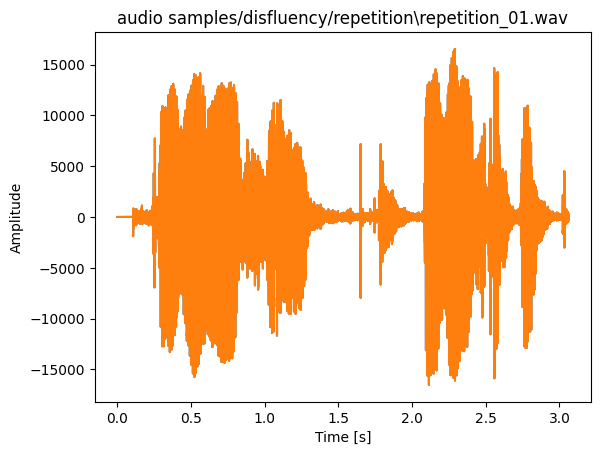

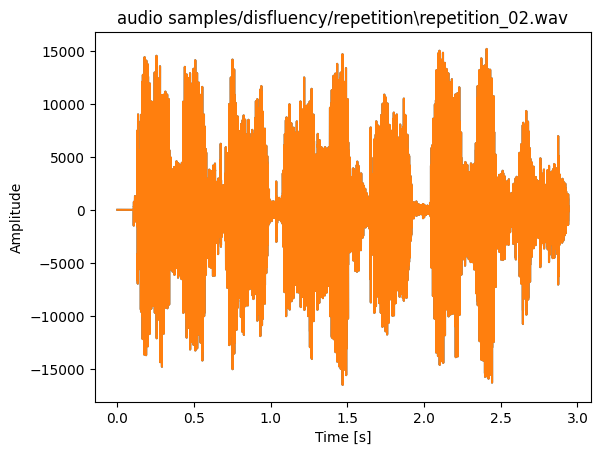

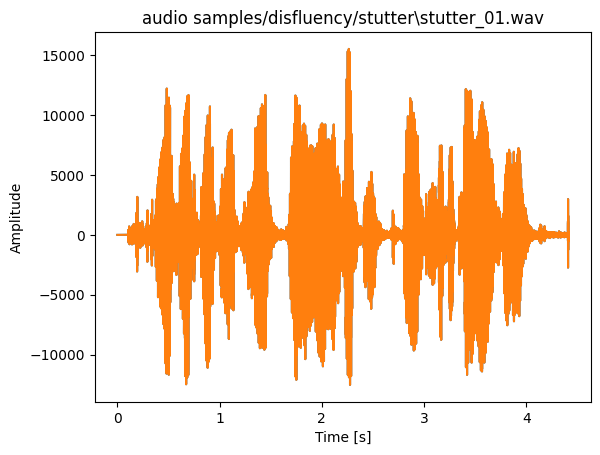

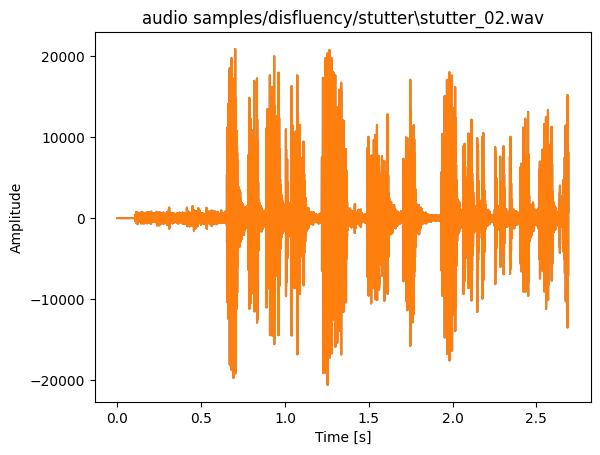

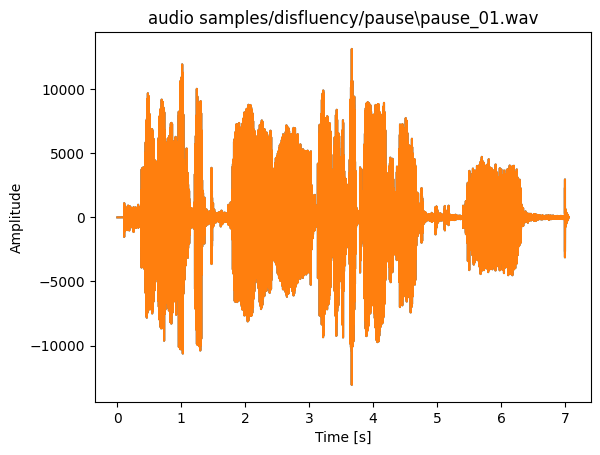

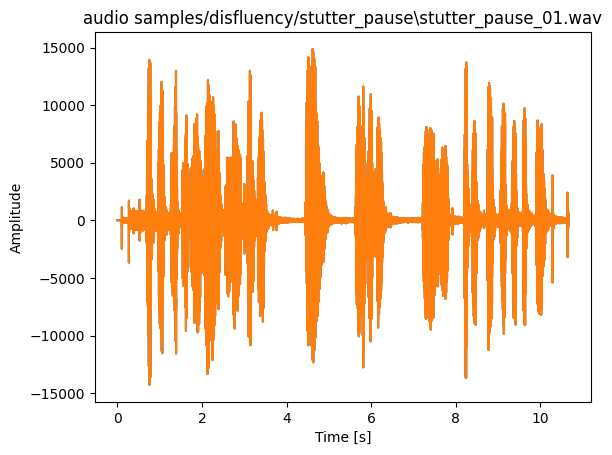

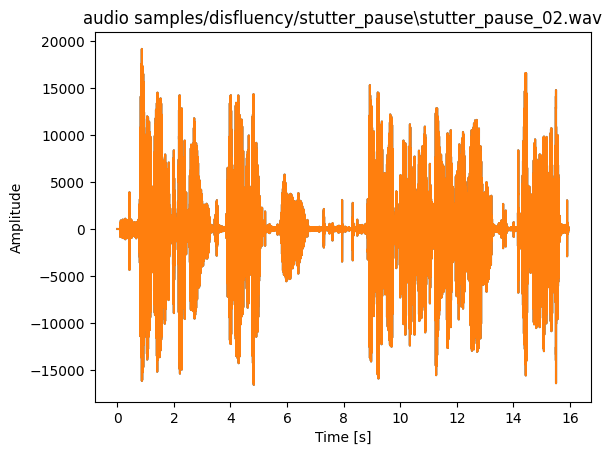

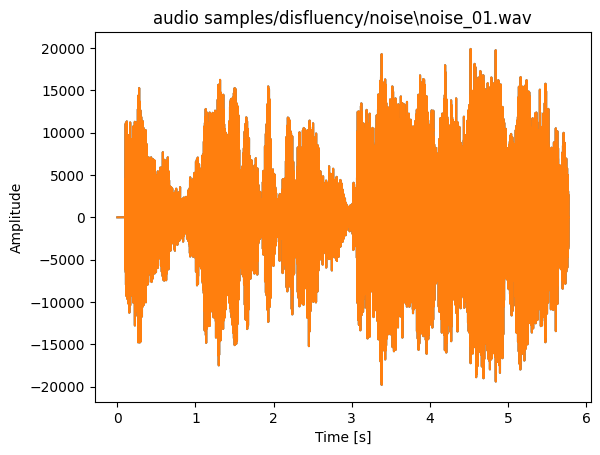

In [23]:
for audio_file in all_disfluencies_files:
    plot_wav(audio_file)

In [14]:
for audio_file in all_disfluencies_files:    
    y, sr = librosa.load(audio_file)
    # Extract energy feature
    energy = np.max(librosa.feature.rms(y=y))
    # Extract pitch feature
    pitches, _ = librosa.piptrack(y=y, sr=sr)
    pitch_mean = np.mean(pitches[pitches > 0])
    print(f"{energy=} , {pitch_mean=} , for {audio_file=}")

energy=0.20391896 , pitch_mean=1527.6758 , for audio_file='audio samples/disfluency/repetition\\repetition_01.wav'
energy=0.16092779 , pitch_mean=1593.7156 , for audio_file='audio samples/disfluency/repetition\\repetition_02.wav'
energy=0.13524725 , pitch_mean=1129.8531 , for audio_file='audio samples/disfluency/stutter\\stutter_01.wav'
energy=0.15325645 , pitch_mean=1469.2366 , for audio_file='audio samples/disfluency/stutter\\stutter_02.wav'
energy=0.13072878 , pitch_mean=1306.0061 , for audio_file='audio samples/disfluency/pause\\pause_01.wav'
energy=0.14344257 , pitch_mean=1237.8278 , for audio_file='audio samples/disfluency/stutter_pause\\stutter_pause_01.wav'
energy=0.16575639 , pitch_mean=1582.1987 , for audio_file='audio samples/disfluency/stutter_pause\\stutter_pause_02.wav'
energy=0.22130021 , pitch_mean=1932.7913 , for audio_file='audio samples/disfluency/noise\\noise_01.wav'


In [40]:
# Function to extract energy and pitch features from audio file
def extract_features(audio_file):
    y, sr = librosa.load(audio_file)
    
    # Extract energy feature
    energy = np.mean(librosa.feature.rms(y=y))
    
    # Extract pitch feature
    pitches, _ = librosa.piptrack(y=y, sr=sr)
    pitch_mean = np.mean(pitches[pitches > 0])
    
    return [energy, pitch_mean]

# Example usage: Extract features from audio files in a dataset
def extract_features_from_dataset(audio_files):
    features = []
    for file in audio_files:
        features.append(extract_features(file))
    return np.array(features)

def extract_mfcc(audio_file):
    y, sr = librosa.load(audio_file)
    # Extract MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return mfcc

def extract_mfcc_from_dataset(audio_files):
    mfccs = []
    for file in audio_files:
        mfccs.append(extract_mfcc(file))
    return mfccs

In [37]:
# Example dataset of audio files and corresponding labels
all_disfluencies_files = stutter_wav_files + pause_wav_files + stutter_pause_wav_files + noise_wav_files
labels = ['stutter'] * len(stutter_wav_files) + ['pause'] * len(pause_wav_files) + ['st_p'] * len(stutter_pause_wav_files) + ['noise'] * len(noise_wav_files)


In [38]:
for (file,label) in zip(all_disfluencies_files,labels):
    print(f"{file=} , {label=}")

file='audio samples/disfluency/stutter\\stutter_01.wav' , label='stutter'
file='audio samples/disfluency/stutter\\stutter_02.wav' , label='stutter'
file='audio samples/disfluency/pause\\pause_01.wav' , label='pause'
file='audio samples/disfluency/stutter_pause\\stutter_pause_01.wav' , label='st_p'
file='audio samples/disfluency/stutter_pause\\stutter_pause_02.wav' , label='st_p'
file='audio samples/disfluency/noise\\noise_01.wav' , label='noise'


In [41]:
# Example dataset of audio files and corresponding labels
all_disfluencies_files = stutter_wav_files + pause_wav_files + stutter_pause_wav_files + noise_wav_files
labels = ['stutter'] * len(stutter_wav_files) + ['pause'] * len(pause_wav_files) + ['st_p'] * len(stutter_pause_wav_files) + ['noise'] * len(noise_wav_files)

# Extract features from the dataset
X = extract_mfcc_from_dataset(all_disfluencies_files)

# Convert labels to numerical format
label_mapping = {'stutter': 1, 'pause': 2, 'st_p': 3, 'noise': 4}
y = np.array([label_mapping[label] for label in labels])

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [51]:
# Flatten the data
X_train_flat = [mfcc.flatten() for mfcc in X_train]
X_test_flat = [mfcc.flatten() for mfcc in X_test]


In [53]:
# Train a Random Forest classifier on the mfcc features
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (4, 13) + inhomogeneous part.